#1 - Đọc dữ liệu

In [1]:
import numpy as np
import pandas as pd
train = pd.read_csv("/content/drive/My Drive/Đồ án Machine Learning/train.csv")
test = pd.read_csv("/content/drive/My Drive/Đồ án Machine Learning/test.csv")
train_df=train.copy()
test_df=test.copy()
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


# 2 - Tiền xử lý, trực quan và phân tích dữ liệu

In [2]:
# lấy tên các thuộc tính 
train_df.columns.unique()

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [3]:
# thông tin về các đặc trưng (thuộc tính)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [4]:
# tính tổng giá trị null trong các thuộc tính 
train_df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


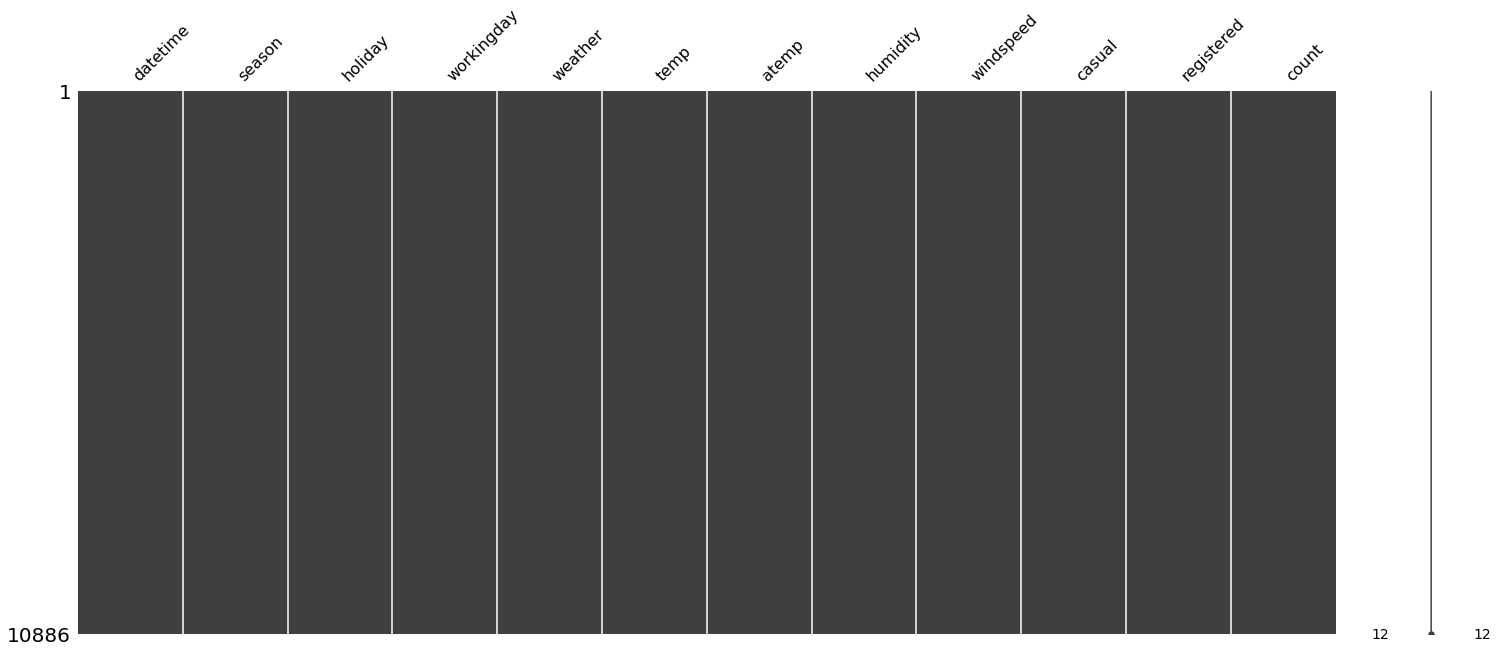

In [5]:
# trực quan cho thấy rằng không có thuộc tính nào bị thiếu giá trị 
# missingno là module trực quan hóa dữ liệu bị thiếu của các thuộc tính trong python (missingno as msno)
import missingno as msno
msno.matrix(train_df)

In [6]:
# đếm các giá trị trong thuộc tính season (1,2,3 và 4 lần lượt tương ứng với spring, summer, fall và winter)
train_df.season.value_counts()

4    2734
3    2733
2    2733
1    2686
Name: season, dtype: int64

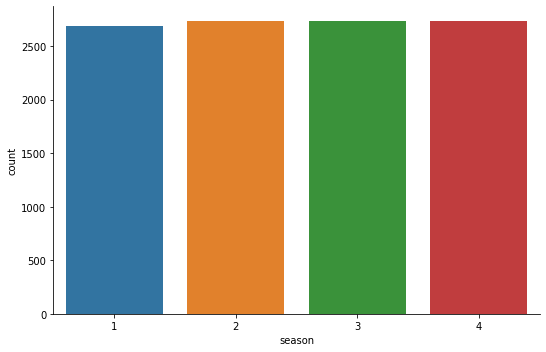

In [7]:
# trực quan hóa các giá trị của thuộc tính season, các cột giá trị gần ngang bằng nhau
import seaborn as sns
sns.catplot(x='season',data=train_df,kind='count',height=5,aspect=1.5)
# x (y, hue): tên của các biến trong dữ liệu.
# data : DataFrame.
# kind : {point, bar, count, box, violin, strip} - Loại biểu đồ/đồ thị để trực quan.
# height: Chiều cao của mỗi cột giá trị. 
# aspect: Chiều rộng của mỗi cột giá trị.

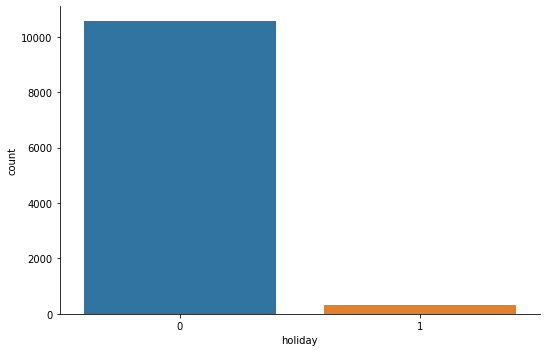

In [8]:
# đếm các giá trị trong thuộc tính holiday (ngày lễ)
train_df.holiday.value_counts()
sns.catplot(x='holiday',data=train_df,kind='count',height=5,aspect=1.5)
# phần lớn dữ liệu là những ngày không nghỉ lễ (non-holiday = 0)

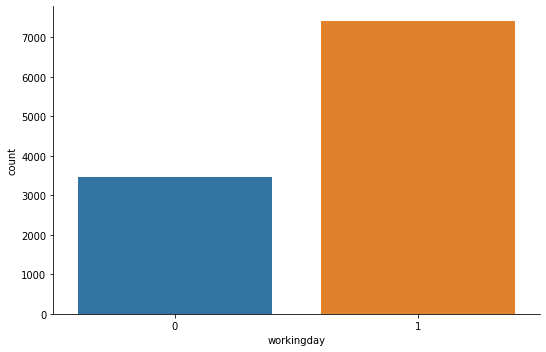

In [9]:
# đếm các giá trị trong thuộc tính workingday (ngày làm việc)
train_df.workingday.value_counts()
sns.catplot(x='workingday',data=train_df,kind='count',height=5,aspect=1.5) 
# phần lớn dữ liệu là những ngày làm việc (workingday = 1, non-workingday = 0)

In [10]:
# đếm các giá trị trong thuộc tính weather 
# 1: Clear, Few clouds, Partly cloudy, Partly cloudy
# 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
train_df.weather.value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

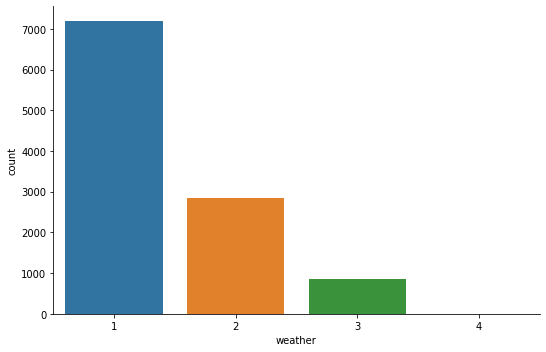

In [11]:
# trực quan hóa các giá trị trong thuộc tính weather (thời tiết)
sns.catplot(x='weather',data=train_df,kind='count',height=5,aspect=1.5)

In [12]:
# bảng thống kê giá trị 
# sự phân phối của các biến liên tục
train_df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


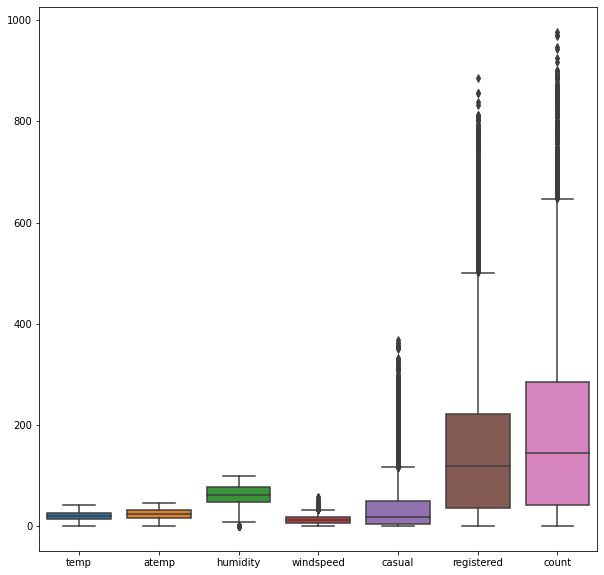

In [13]:
# trực quan hóa bằng biểu đồ boxplot 
# Biểu đồ boxplot sẽ cho ta biết đặc trưng về phân phối của 1 biến dựa trên các giá trị trung bình, min, max, các khoảng phân vị 25%, 50%, 75%
# Dao động của biểu đồ hộp càng hẹp thì độ ảnh hưởng càng cao 
import matplotlib.pyplot as plt
sns.boxplot(data = train_df[['temp','atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']])
fig=plt.gcf() # gcf (get current figure) và plt.gcf () cho phép bạn có được một tham chiếu đến hình hiện tại khi sử dụng pyplot.
fig.set_size_inches(10,10)

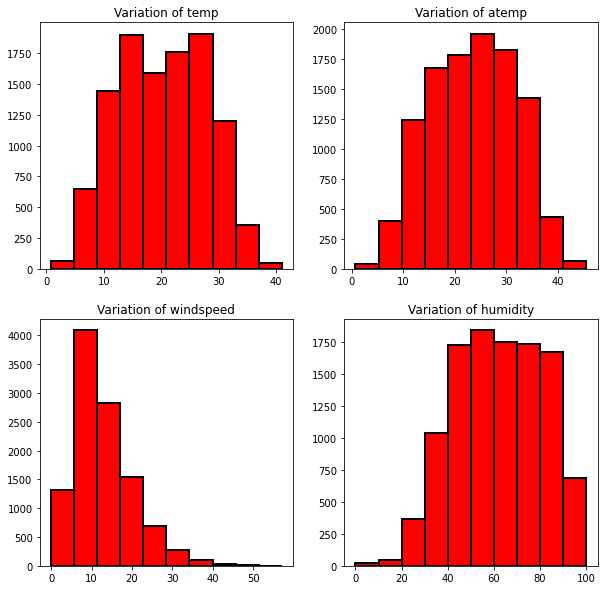

In [14]:
# trực quan các giá trị của các thuộc tính temp, atemp, windspeed, humidity bằng Histogram.
# x: tên thuộc tính.
# data: DataFrame.
# edgecolor: Màu đường viền của cột giá trị.
# linewidth: Độ dày đường viền.
# color: màu của cột giá trị.
train_df.temp.unique()
fig,axes=plt.subplots(2,2)
axes[0,0].hist(x="temp",data=train_df,edgecolor="black",linewidth=2,color='red')
axes[0,0].set_title("Variation of temp") # đặt tiêu đề cho biểu đồ 
axes[0,1].hist(x="atemp",data=train_df,edgecolor="black",linewidth=2,color='red')
axes[0,1].set_title("Variation of atemp")
axes[1,0].hist(x="windspeed",data=train_df,edgecolor="black",linewidth=2,color='red')
axes[1,0].set_title("Variation of windspeed")
axes[1,1].hist(x="humidity",data=train_df,edgecolor="black",linewidth=2,color='red')
axes[1,1].set_title("Variation of humidity")
fig.set_size_inches(10,10)

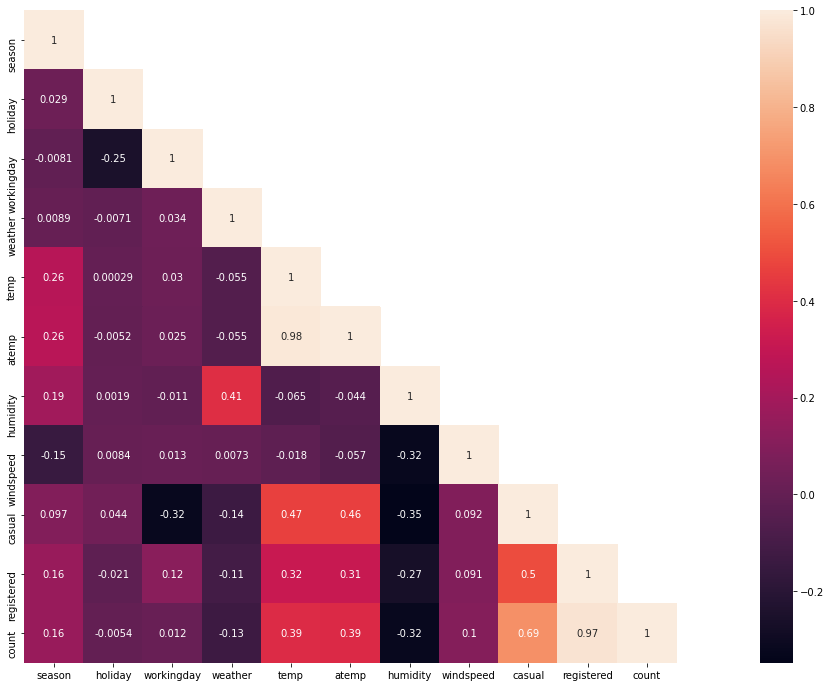

In [15]:
corr_matrix= train_df[:].corr() # tạo ma trận tương quan từ các thuộc tính 
mask = np.array(corr_matrix) # chuyển ma trận thành dạng mảng
mask[np.tril_indices_from(mask)] = False # tạo ma trận tam giác dưới 
fig=plt.gcf() # gcf (get current figure) và plt.gcf () cho phép bạn có được một tham chiếu đến hình hiện tại khi sử dụng pyplot.
fig.set_size_inches(30,12) # điều chỉnh kích thước hình ảnh 
sns.heatmap(data=corr_matrix,mask=mask,square=True,annot=True,cbar=True) # trực quan ma trận tương quan sử dụng heatmap

In [16]:
# Suy luận từ heatmap ở trên
# 1. Temp và atemp có sự liên quan cao như kỳ vọng 
# 2. Humidity có liên quan nghịch đảo với thuộc tính count vì thời tiết ẩm ướt mọi người sẽ không di chuyển bằng xe đạp.
# 3. Count và Holiday có sự tương quan nghịch đảo 
# 4. Temp (hoặc atemp) có ảnh hưởng lớn đến thuộc tính count.
# 5. Cũng lưu ý rằng weather và count có liên quan nghịch đảo cao. 
# Khi thời tiết tăng từ (1 đến 4) ngụ ý rằng thời tiết ngày càng tồi tệ hơn và vì vậy sẽ có ít người thuê xe đạp hơn.
# 6. registered/casual và count  có liên quan cao cho thấy hầu hết các xe đạp được thuê đều được đăng ký.

In [17]:
# thực hiện các thao tác với các đặc trưng để có thể tạo ra thêm một vài đặc trưng mới đồng thời loại bỏ đi các đặc trưng vô dụng, ít liên quan
# tách season thành 4 đặc trưng đại diện cho mỗi mùa
season=pd.get_dummies(train_df['season'],prefix='season') 
# prefix: tên của các cột bổ sung được tách ra từ đặc trưng chính, tên này sẽ được ghép cùng với _giá trị trong cột gốc (season: 1,2,3,4)
# Sử dụng pd.concat() cho phép ghép 4 thuộc tính mới được tách ra từ thuộc tính season vào dataframe train
# Với axis = 0 ghép theo hàng dọc (theo dòng), axis = 1 ghép theo hàng ngang (theo cột)
train_df=pd.concat([train_df,season],axis=1) 
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,season_1,season_2,season_3,season_4
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,0,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,0,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,0,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,0,0,0


In [18]:
# tương tự với dataframe test
season=pd.get_dummies(test_df['season'],prefix='season')
test_df=pd.concat([test_df,season],axis=1)
test_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,1,0,0,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,0,0,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,0,0,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,1,0,0,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,1,0,0,0


In [19]:
# thực hiện tương tự với thuộc tính weather ở dataframe train và test 
weather=pd.get_dummies(train_df['weather'],prefix='weather')
train_df=pd.concat([train_df,weather],axis=1)
train_df.head()
weather=pd.get_dummies(test_df['weather'],prefix='weather')
test_df=pd.concat([test_df,weather],axis=1)
test_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,1,0,0,0,1,0,0,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0


In [20]:
# Bỏ cột weather và season
# inplace = True: thao tác được thực hiện trực tiếp trên dataframe gốc,không có gt trả về do đó không cần phải có thêm bước gán lại cho train_df
# axis = 1: cột (axis = 0: hàng)
train_df.drop(['season','weather'],inplace=True,axis=1)
train_df.head()
test_df.drop(['season','weather'],inplace=True,axis=1)
test_df.head()

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,2011-01-20 00:00:00,0,1,10.66,11.365,56,26.0027,1,0,0,0,1,0,0,0
1,2011-01-20 01:00:00,0,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0
2,2011-01-20 02:00:00,0,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0
3,2011-01-20 03:00:00,0,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0
4,2011-01-20 04:00:00,0,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0


In [21]:
# Bây giờ quan trọng nhất là phân chia ngày và thời gian vì thời gian trong ngày dự kiến sẽ ảnh hưởng đến việc không có xe đạp. 
# Ví dụ như vào giờ hành chính như buổi sáng sớm hoặc buổi tối, người ta sẽ có nhu cầu thuê xe đạp lớn hơn.
train_df["hour"] = [t.hour for t in pd.DatetimeIndex(train_df.datetime)]     # Giờ hiện tại 
train_df["day"] = [t.dayofweek for t in pd.DatetimeIndex(train_df.datetime)] # Thứ tự của ngày trong tuần: {0,1,2,3,4,5,6}
train_df["month"] = [t.month for t in pd.DatetimeIndex(train_df.datetime)]   # Tháng hiện tại
train_df['year'] = [t.year for t in pd.DatetimeIndex(train_df.datetime)]     # Năm hiện tại
train_df['year'] = train_df['year'].map({2011:0, 2012:1})                    # Năm hiện tại: quy ước rằng 2011 = 0 và 2012 = 1
train_df.head()

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,hour,day,month,year
0,2011-01-01 00:00:00,0,0,9.84,14.395,81,0.0,3,13,16,1,0,0,0,1,0,0,0,0,5,1,0
1,2011-01-01 01:00:00,0,0,9.02,13.635,80,0.0,8,32,40,1,0,0,0,1,0,0,0,1,5,1,0
2,2011-01-01 02:00:00,0,0,9.02,13.635,80,0.0,5,27,32,1,0,0,0,1,0,0,0,2,5,1,0
3,2011-01-01 03:00:00,0,0,9.84,14.395,75,0.0,3,10,13,1,0,0,0,1,0,0,0,3,5,1,0
4,2011-01-01 04:00:00,0,0,9.84,14.395,75,0.0,0,1,1,1,0,0,0,1,0,0,0,4,5,1,0


In [22]:
# Thực hiện tương tự với test dataframe 
test_df["hour"] = [t.hour for t in pd.DatetimeIndex(test_df.datetime)]
test_df["day"] = [t.dayofweek for t in pd.DatetimeIndex(test_df.datetime)]
test_df["month"] = [t.month for t in pd.DatetimeIndex(test_df.datetime)]
test_df['year'] = [t.year for t in pd.DatetimeIndex(test_df.datetime)]
test_df['year'] = test_df['year'].map({2011:0, 2012:1})
test_df.head()

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,hour,day,month,year
0,2011-01-20 00:00:00,0,1,10.66,11.365,56,26.0027,1,0,0,0,1,0,0,0,0,3,1,0
1,2011-01-20 01:00:00,0,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0,1,3,1,0
2,2011-01-20 02:00:00,0,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0,2,3,1,0
3,2011-01-20 03:00:00,0,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0,3,3,1,0
4,2011-01-20 04:00:00,0,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0,4,3,1,0


In [23]:
# Bây giờ chúng ta có thể bỏ cột datetime ở train_df do đã có các cột thuộc tính mới thay thế nó 
# inplace = True: thao tác được thực hiện trực tiếp trên dataframe gốc,không có gt trả về do đó không cần phải có thêm bước gán lại cho train_df
# axis = 1: cột (axis = 0: hàng)
train_df.drop('datetime',axis=1,inplace=True)
train_df.head()

,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,hour,day,month,year
0,0,0,9.84,14.395,81,0.0,3,13,16,1,0,0,0,1,0,0,0,0,5,1,0
1,0,0,9.02,13.635,80,0.0,8,32,40,1,0,0,0,1,0,0,0,1,5,1,0
2,0,0,9.02,13.635,80,0.0,5,27,32,1,0,0,0,1,0,0,0,2,5,1,0
3,0,0,9.84,14.395,75,0.0,3,10,13,1,0,0,0,1,0,0,0,3,5,1,0
4,0,0,9.84,14.395,75,0.0,0,1,1,1,0,0,0,1,0,0,0,4,5,1,0


In [24]:
# Bỏ cột casual và registered ở train_df 
train_df.drop(['casual','registered'],axis=1,inplace=True)
train_df.head()

,holiday,workingday,temp,atemp,humidity,windspeed,count,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,hour,day,month,year
0,0,0,9.84,14.395,81,0.0,16,1,0,0,0,1,0,0,0,0,5,1,0
1,0,0,9.02,13.635,80,0.0,40,1,0,0,0,1,0,0,0,1,5,1,0
2,0,0,9.02,13.635,80,0.0,32,1,0,0,0,1,0,0,0,2,5,1,0
3,0,0,9.84,14.395,75,0.0,13,1,0,0,0,1,0,0,0,3,5,1,0
4,0,0,9.84,14.395,75,0.0,1,1,0,0,0,1,0,0,0,4,5,1,0


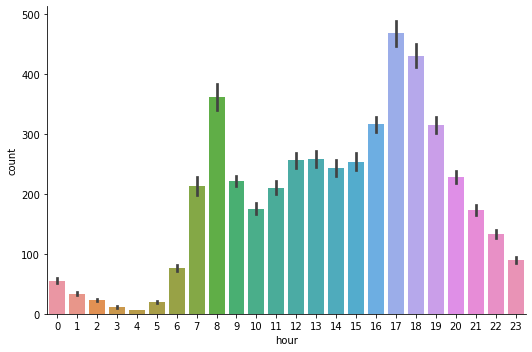

In [25]:
# Trực quan mức độ xe được thuê trong mỗi giờ 
# x: thuộc tính hour (giờ) - y: thuộc tính count 
# data : DataFrame.
# kind : {point, bar, count, box, violin, strip} - Loại biểu đồ/đồ thị để trực quan.
# height: Chiều cao của mỗi cột giá trị. 
# aspect: Chiều rộng của mỗi cột giá trị.
sns.catplot(x="hour",y="count",data=train_df,kind='bar',height=5,aspect=1.5)

# NHẬN XÉT: 
# Số lượng xe đạp được thuê cao vào khoảng thời gian 7g-9g và 15g-19g, đây là khoảng thời gian văn phòng cao điểm vì vậy sẽ có nhiều người thuê xe đạp (còn nhiều lý do khác)

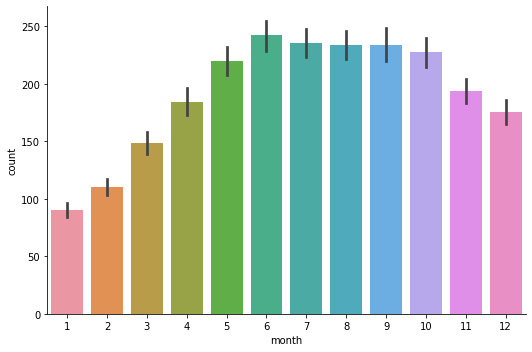

In [26]:
# Trực quan mức độ xe được thuê trong mỗi tháng
# x: thuộc tính hour (giờ) - y: thuộc tính count 
# data : DataFrame.
# kind : {point, bar, count, box, violin, strip} - Loại biểu đồ/đồ thị để trực quan.
# height: Chiều cao của mỗi cột giá trị. 
# aspect: Chiều rộng của mỗi cột giá trị.
sns.catplot(x="month",y="count",data=train_df,kind='bar',height=5,aspect=1.5)

# NHẬN XÉT: 
# Mỗi tháng mang một điều kiện thời tiết riêng như (trời mưa, sương mù,...) nên điều đó sẽ ảnh hưởng đến số lượng xe được thuê

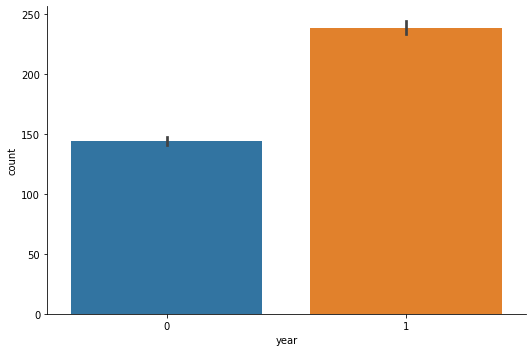

In [27]:
# Trực quan mức độ xe được thuê trong năm 2011 và 2012 ở train_df (0 = 2011 và 1 = 2012)
sns.catplot(x="year",y="count",data=train_df,kind='bar',height=5,aspect=1.5)

# NHẬN XÉT: 
# Tổng số lượng xe được thuê ở năm 2012 cao hơn 2011 chứng tỏ rằng nhu cầu sử dụng của con người ngày càng tăng lên

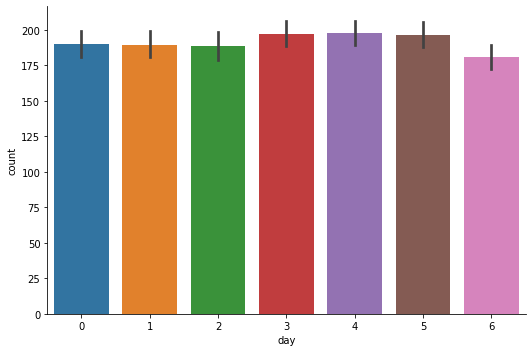

In [28]:
# Trực quan mức độ xe được thuê vào các thứ trong tuần (thứ 2 ứng với 0 lần lượt đến chủ nhật ứng với 6)
sns.catplot(x="day",y='count',data=train_df,kind='bar',height=5,aspect=1.5)

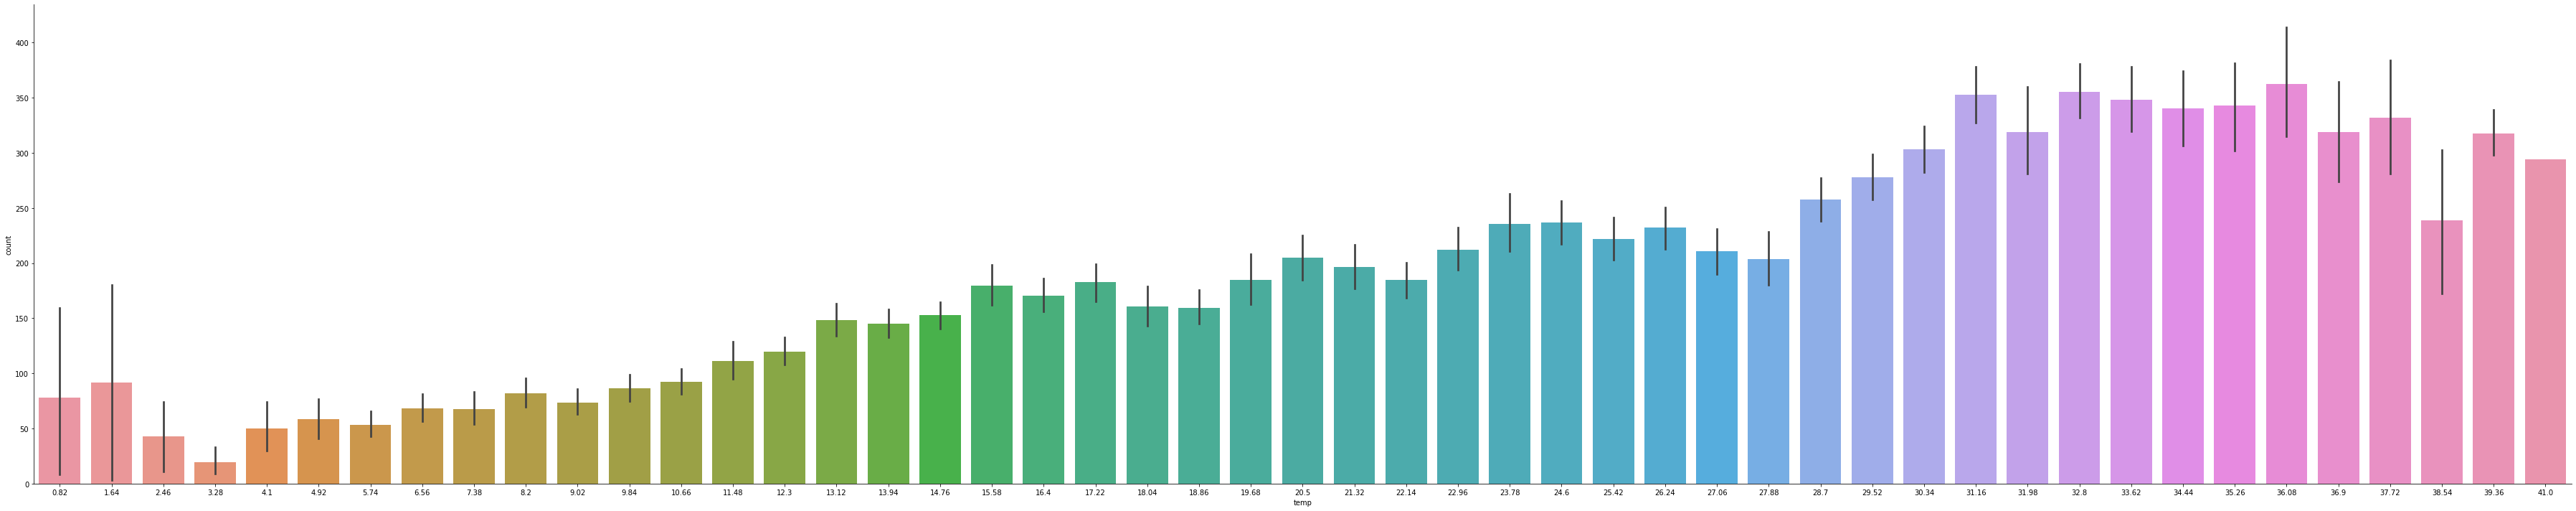

In [29]:
# Trực quan mức độ xe được thuê dựa theo nhiệt độ
sns.catplot(x="temp",y='count',data=train_df,kind='bar',height=10,aspect=5)

# NHẬN XÉT: 
# Nhiệt độ càng thấp lượng xe được thuê càng ít do phần lớn khách hàng sẽ hạn chế đi ra ngoài hơn.

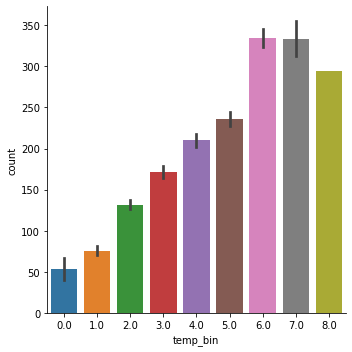

In [30]:
# Do temp là một biến có giá trị liên tục và có nhiều giá trị nên khi trực quan kích thước ảnh rất lớn
# Ta sẽ tiến hành rời rạc hóa giá trị nhiệt độ theo từng khoảng để dễ dàng quan sát và phân tích 
new_df=train_df.copy()
new_df['temp_bin']=np.floor(new_df['temp'])//5 # Hàm floor sẽ output ra số nguyên (âm hoặc dương) gần nhất của một giá trị input (số thực, số nguyên,...) 
                                               # tương ứng sao cho output <= input. Vd: 11.2 -> 11; -11.2 -> -12; 11 -> 11;...
new_df['temp_bin'].unique()                    # Hàm unique sẽ lấy một giá trị đại diện duy nhất trong các giá trị lặp lại, giống nhau 
                                               # và sắp xếp theo thứ tự tăng dần.

# now we can visualize as follows
sns.catplot(x="temp_bin",y="count",data=new_df,kind='bar',height=5,aspect=1)

# 3 - Chia tập dữ liệu huấn luyện thành 2 phần: train và validation (tập kiểm thử)

In [31]:
# Ta chia tập train thành 2 phần, 1 phần để huấn luyện (training set) và 1 phần để kiểm định (validation set)
from sklearn.model_selection import train_test_split
x_train,x_validation,y_train,y_validation=train_test_split(train_df.drop('count',axis=1),train_df['count'],test_size=0.25,random_state=42)

# 4 - Huấn luyện mô hình và đánh giá kết quả bằng RMSLE và R2 Score

In [32]:
# Huấn luyện mô hình với Knn và Random forest 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score

models=[KNeighborsRegressor(n_neighbors=5), RandomForestRegressor(n_estimators=100, random_state=42)]
model_names=['KNeighborsRegressor','RandomForestRegressor']
rmsle=[]
r2score=[]
d={}

for i in range (len(models)):
    model=models[i]
    model.fit(x_train,y_train)
    y_validation_pred=model.predict(x_validation)
    rmsle.append(np.sqrt(mean_squared_log_error(y_validation,y_validation_pred)))
    r2score.append(r2_score(y_validation, y_validation_pred))

In [33]:
d={'Modelling Algorithm':model_names,'RMSLE':rmsle}
rmsle_frame=pd.DataFrame(d)
rmsle_frame

,Modelling Algorithm,RMSLE
0,KNeighborsRegressor,0.861661
1,RandomForestRegressor,0.320321


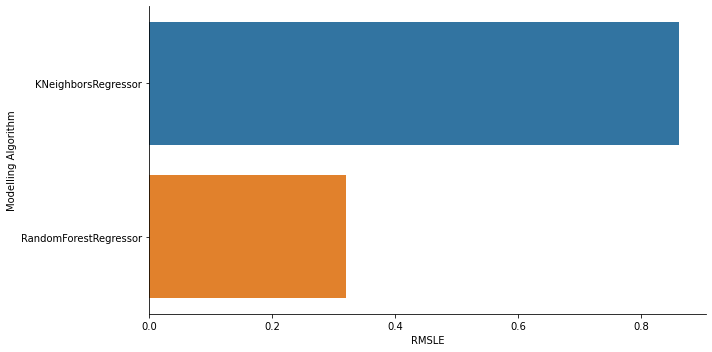

In [34]:
# Trực quan hóa kết quả RMSLE của 2 thuật toán 
sns.catplot(y='Modelling Algorithm',x='RMSLE',data=rmsle_frame,kind='bar',height=5,aspect=2)

# NHẬN XÉT:
# Kết quả càng thấp thì càng tốt, càng có giá trị, quan sát ta thấy RMSLE của RandomForestRegressor cho kết quả thấp hơn RMSLE của KNNRegressor

In [35]:
d={'Modelling Algorithm':model_names,'R2 Score':r2score}
r2score_frame=pd.DataFrame(d)
r2score_frame

,Modelling Algorithm,R2 Score
0,KNeighborsRegressor,0.578167
1,RandomForestRegressor,0.955215


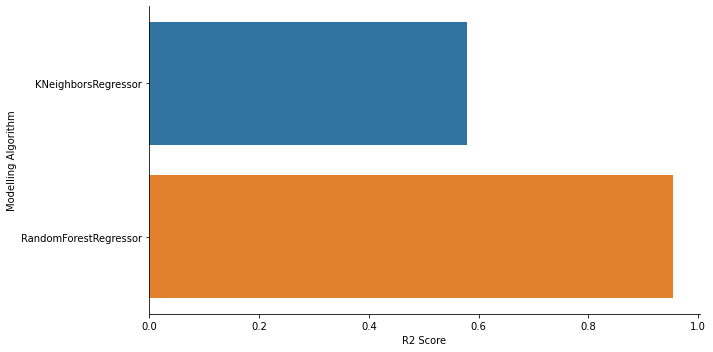

In [36]:
# Trực quan hóa kết quả R2 Score của 2 thuật toán 
sns.catplot(y='Modelling Algorithm',x='R2 Score',data=r2score_frame,kind='bar',height=5,aspect=2)

# NHẬN XÉT:
# Kết quả càng lớn (càng gần 1) thì độ chính xác của mô hình với tập dữ liệu đang xét càng cao.

# 5 - Sử dụng mô hình để dự đoán trên tập test 

In [37]:
# TIẾN HÀNH DỰ ĐOÁN TRÊN TẬP TEST (DỰ ĐOÁN TỪ NGÀY 20 ĐẾN CUỐI THÁNG)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)
y_test_pred = model.predict(test_df.drop('datetime',axis=1))
d={'datetime':test['datetime'],'count':y_test_pred}
ans=pd.DataFrame(d)
ans.to_csv('/content/drive/My Drive/Đồ án Machine Learning/Predicted_Submission_BikeSharingDemand.csv',index=False)

# 6 - Lưu model 

In [38]:
# SAVE MODEL TO DISK WITH "JOBLIB" 
import joblib
filename = "/content/drive/My Drive/Đồ án Machine Learning/RandomForestRegressor_BikeSharingDemand.sav"
joblib.dump(model,filename)

# LOAD THE MODEL FROM DISK
loaded_model = joblib.load(filename)
result = loaded_model.score(x_validation,y_validation)
print(result)

0.9552152414212466
